# Simulating a neuronal Network

In [2]:
import numpy as np
from neuronal_network import *

## Class 1: simple neuronal network model

In [3]:
# Create a LifNeuron object
n1 = LifNeuron(100, 1, 0.75, 0.9)

# Generate random inputs
my_inputs = np.random.random(100)

# Integrate the inputs in the neuron
n1.integration(my_inputs)

# Print the value of V (membrane potential) and out (output) of the LifNeuron
print(n1.V)
print(n1.out)

-0.6503678647884897
0


In [4]:
# Create a Layer object with sigmoid neurons
l1 = Layer(n_neurons=20, n_inputs=10, ntype='sigmoid')

# Generate random inputs
my_inputs = np.random.random(10)

# Update the layer with the inputs
l1.update(my_inputs)

# Print the values of V (membrane potential) for each neuron in the layer
print([neuron.V for neuron in l1.neurons])

[0.27812316137633114, 0.21242594540981202, 0.7401498249135868, 0.31385244533885975, 0.7517060691433005, 0.7419343519205772, 0.42672426583479733, 0.2812630627495962, 0.39880030779477615, 0.5323281476331793, 0.11241768668488598, 0.6283434803588167, 0.6712096959520729, 0.6564343097705033, 0.45497153758834735, 0.3844784437872501, 0.4523644981605893, 0.6325541684999538, 0.6292396009894482, 0.35522817344168345]


In [5]:
# Create a Network object with sigmoid neurons
net = Network(n_layers=100, n_neurons=100, n_inputs=100, n_outputs=10, ntype='lif', threshold=1, resetPot=0.5, memTimeConst=1)

# Generate random inputs
my_inputs = np.random.random(100)

# Run the network with the inputs and an exit threshold of 0.5
net.run(my_inputs, 0.5)

(0.64,
 array([0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0,
        1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0,
        1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1,
        1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0,
        0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0]))

## Class 2-3: Visualize input

In [14]:
# Run for many times and visualize the output
N = 100

outputs = np.zeros(N)
for i in range(N):
    my_inputs = np.random.random(100)
    outputs[i] = net.run(my_inputs, 0.5)[0]
    net.clearActivity()

[0.29 0.08 0.62 0.08  inf 0.74 0.7   inf 0.64 0.64  inf 0.56  inf 0.22
 0.22 0.62 0.69 0.83 0.25 0.62 0.57 0.15 0.64 0.33 0.64 0.08 0.69 0.69
 0.69  inf  inf 0.45 0.74 0.85 0.69 0.25 0.22 0.54 0.74 0.74 0.15 0.74
 0.22 0.03 0.54 0.15 0.91 0.15 0.64 0.15 0.25 0.22 0.33 0.45 0.92 0.45
 0.15 0.33 0.33  inf 0.22 0.45 0.33 0.15  inf 0.25 0.22 0.22 0.22  inf
 0.29 0.74 0.45 0.15 0.22 0.7   inf  inf 0.22 0.25 0.31 0.33 0.22 0.57
 0.33 0.3  0.29 0.74 0.15  inf  inf 0.29 0.22 0.64 0.43 0.51  inf 0.7
 0.43  inf]


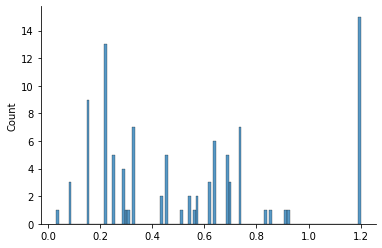

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

print(outputs)

outputs[outputs==np.inf] = 1.2
sns.histplot(outputs, bins=120)
sns.despine()
plt.show()

## Class 4: define as time-aware SAS



We first decribe one network as a time-aware SAS and then combine multiple network into a large system of multiple networks to fomulate the following system:
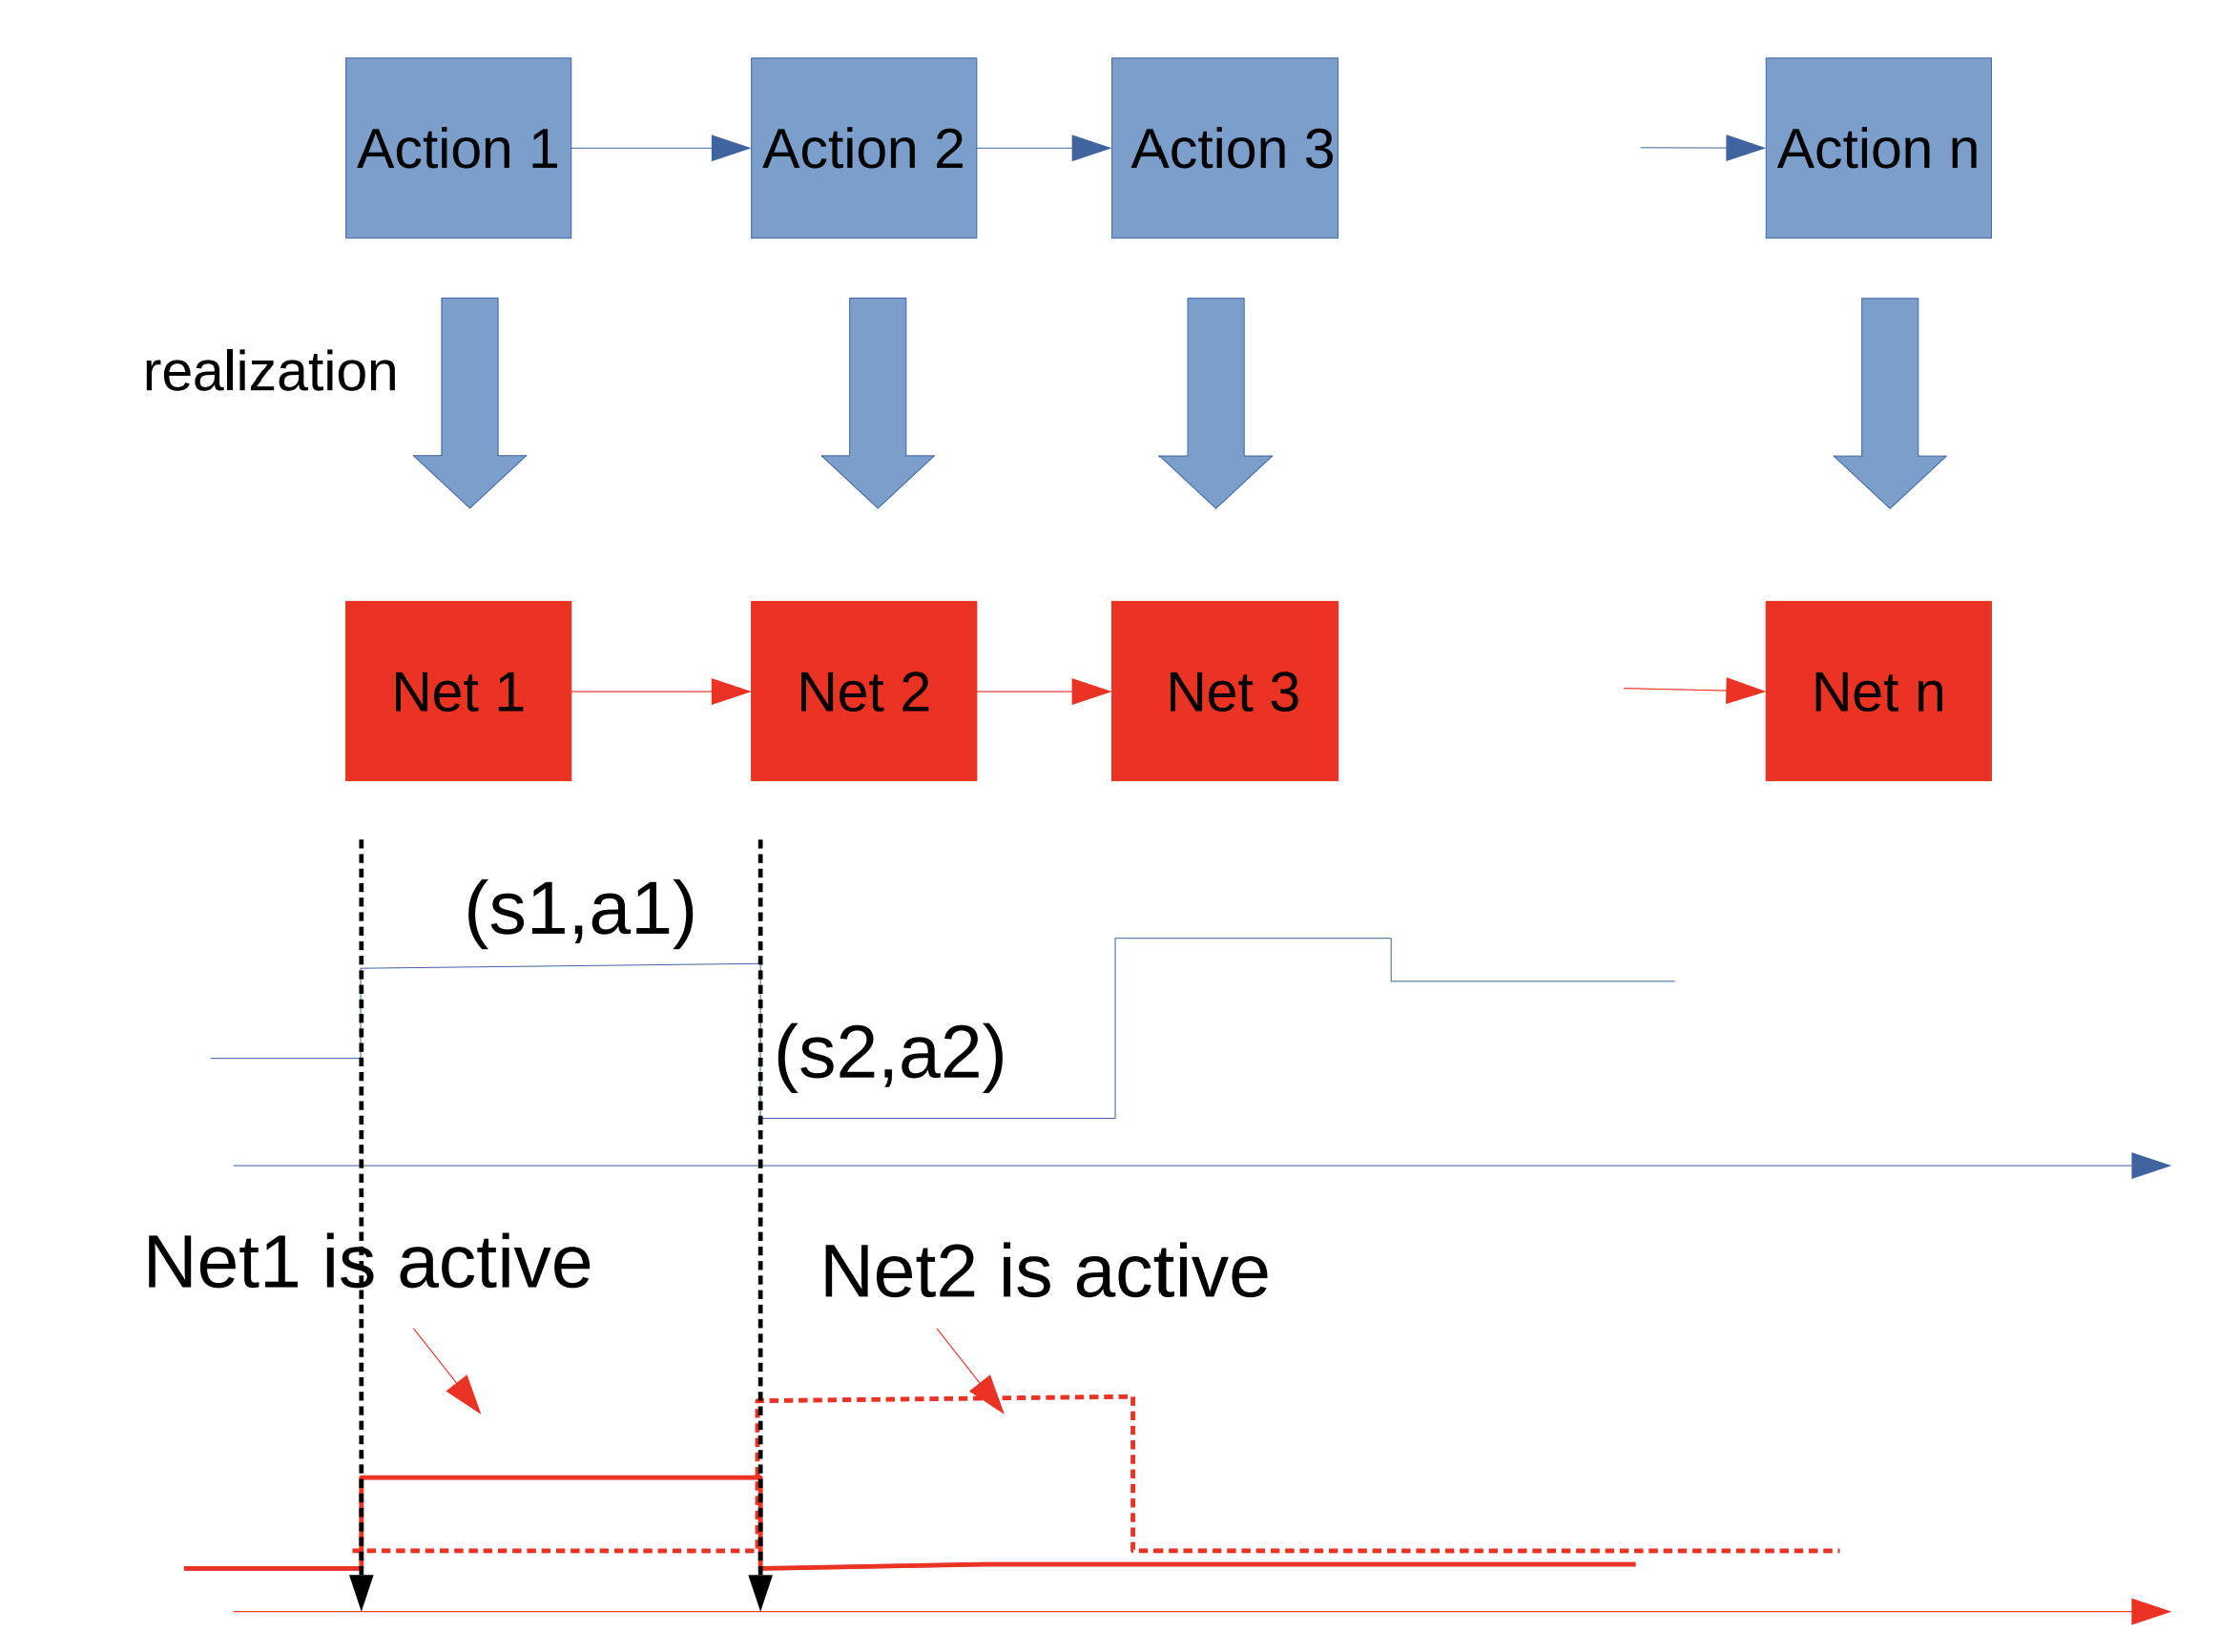

Let's start with the single network: For a network with $n$ layers, we define it as the time-aware SAS $N = \{0, \dots, n\} \times [0,\infty)$ with a transition function $\delta(s,n) = $

We now want to model a system of different networks. Only 1 network is active at a time and it's active for a certain amount of time. For now, we choose to have 3 networks. We can control their behaviour by changing their theshold $\theta$, membrane time constant $\theta$, and reset potential $\tau_{\text{res}}$. 

We define the system as a time-aware SAS $Q = \{N_0,N_1,N_2\} \times [0, \infty)$ with $q = (s, e)$.

we choose the transition function as 
$$\delta(s, e) = 
    \begin{cases} 
        (s+1, e+?) &\text{if } s\in\{0,1\} \\ 
        (0, e+?) &\text{if } s=2 
    \end{cases}$$